<a href="https://colab.research.google.com/github/Prattoypaul/deeplearning/blob/machinel/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/defence/archive (76)/Copy of Copy of Customer-Churn-Prediction.csv')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df=df.drop('customerID',axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [ ]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [ ]:

df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [ ]:
df.iloc[488].TotalCharges

' '

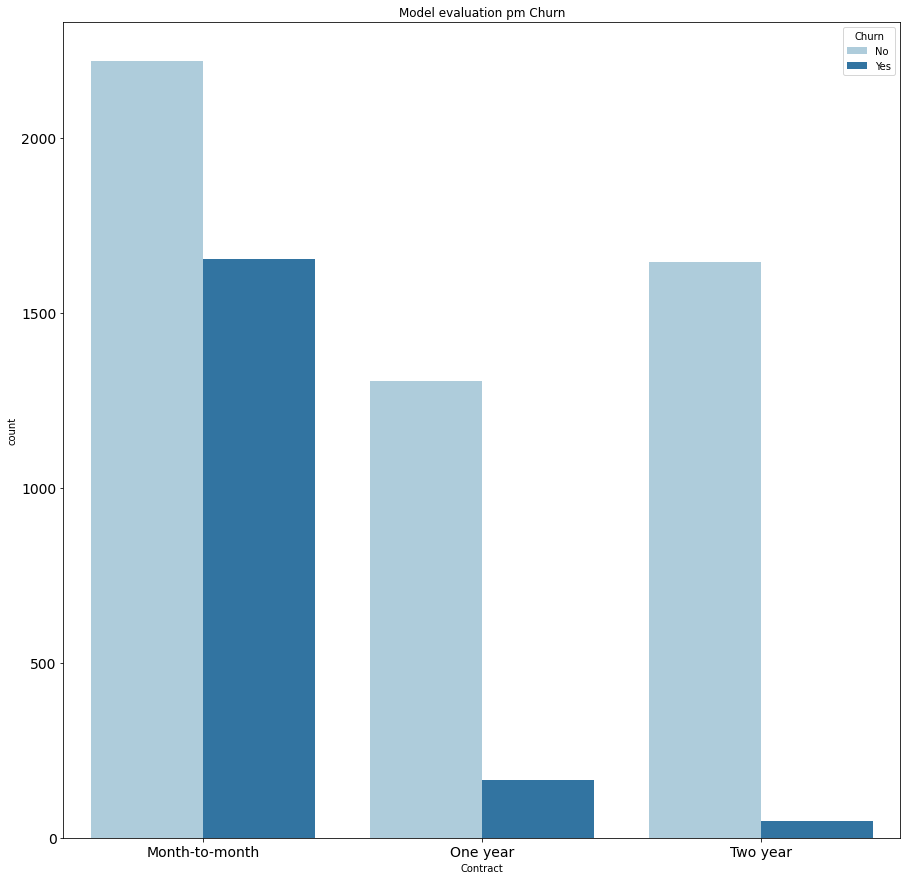

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(x='Contract',data=df,hue='Churn',palette='Paired')
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)
plt.title('Model evaluation pm Churn')
plt.show()


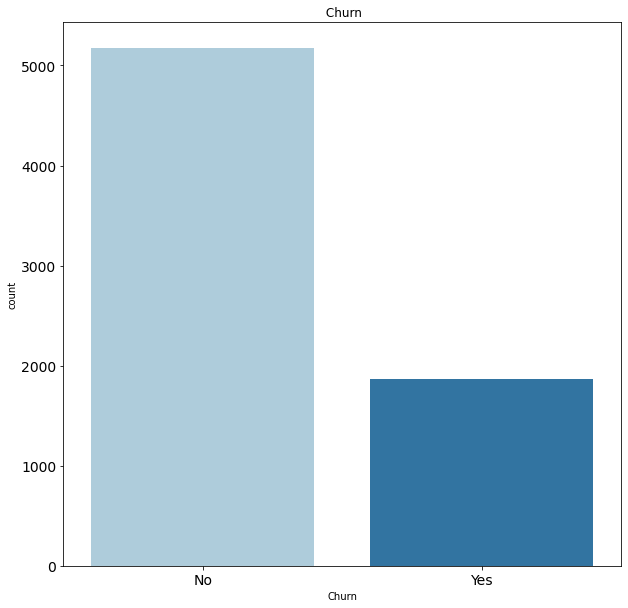

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='Churn',data=df,palette='Paired')
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)
plt.title(' Churn')
plt.show()

In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [ ]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 53 37 36 41  6  4 33 67 23 57 61 14 20 40 59 24 44 19 54 51 55 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: [0 1]


In [ ]:
df = df[df.TotalCharges!=' ']

In [ ]:
df.shape

(7032, 20)

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [ ]:
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,Male,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,Male,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,Male,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,Female,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


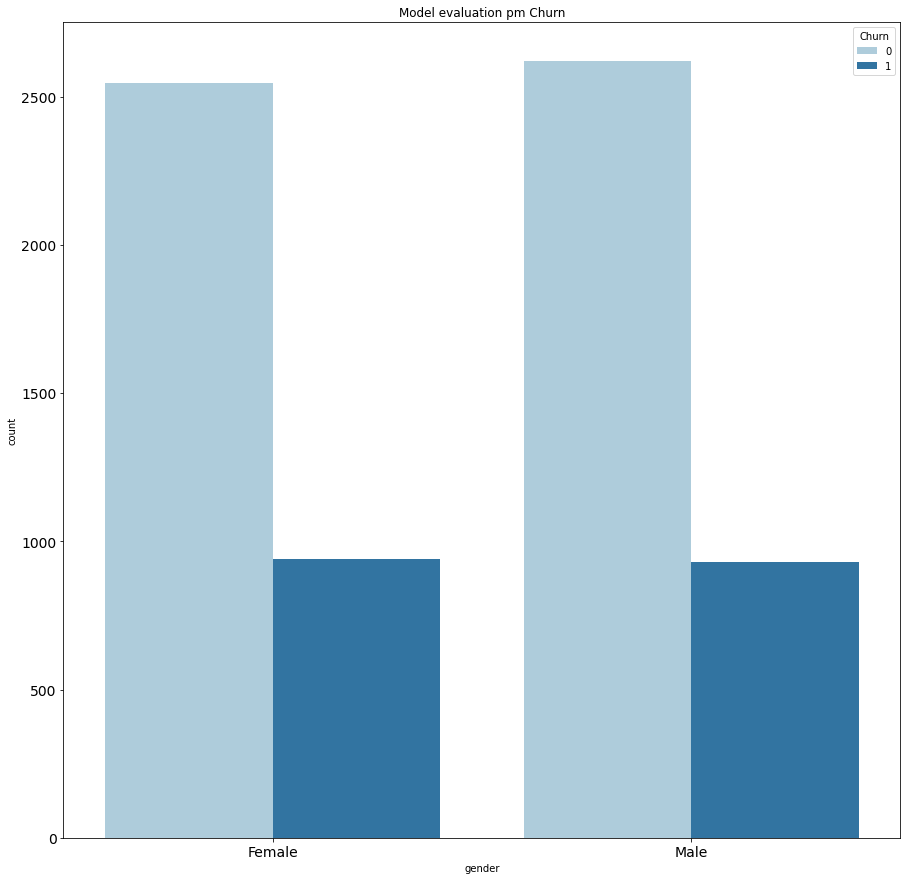

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(x='gender',data=df,hue='Churn',palette='Paired')
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)
plt.title('Model evaluation pm Churn')
plt.show()

In [ ]:
df['gender'].replace({'Female':0,'Male':1},inplace=True)


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')


In [ ]:
x, y = smote.fit_resample(x, y)

y.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
xtrain.shape


(8260, 26)

In [ ]:
xtest.shape

(2066, 26)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
def performance(model):

  print('Confusion matrix is :') 
  cm = confusion_matrix(ytest, model.predict(xtest)) 
  print(cm) 
  print() 
  classificationReport = classification_report(ytest, model.predict(xtest)) 
  print("Classification Report : ") 
  print (classificationReport) 
  print("\n") 
  print('Testing accuracy : ',model.score(xtest,ytest)*100) 
  print("Training accuracy:",model.score(xtrain,ytrain)*100) 

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp=MLPClassifier()

In [ ]:
mlp.fit(xtrain,ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
y_pred_mlp=mlp.predict(xtest)

In [ ]:
performance(mlp)

Confusion matrix is :
[[839 202]
 [156 869]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1041
           1       0.81      0.85      0.83      1025

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



Testing accuracy :  82.67182962245886
Training accuracy: 87.17917675544794


In [ ]:

from sklearn.svm import SVC


In [ ]:
svc=SVC()

In [ ]:
svc.fit(xtrain,ytrain)

SVC()

In [ ]:
ypred_svc=svc.predict(xtest)
performance(svc)

Confusion matrix is :
[[810 231]
 [169 856]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1041
           1       0.79      0.84      0.81      1025

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



Testing accuracy :  80.63891577928364
Training accuracy: 82.76029055690073


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kng= KNeighborsClassifier()

In [ ]:
kng.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
ypred_knn=kng.predict(xtest)
performance(kng)

Confusion matrix is :
[[740 301]
 [118 907]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1041
           1       0.75      0.88      0.81      1025

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066



Testing accuracy :  79.71926427879961
Training accuracy: 85.50847457627118


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc = dtc.predict(xtest)

performance(dtc)

Confusion matrix is :
[[779 262]
 [216 809]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1041
           1       0.76      0.79      0.77      1025

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



Testing accuracy :  76.86350435624395
Training accuracy: 99.86682808716706


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [ ]:
y_pred_rfc = rfc.predict(xtest)

performance(rfc)

Confusion matrix is :
[[845 196]
 [140 885]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1041
           1       0.82      0.86      0.84      1025

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



Testing accuracy :  83.73668925459826
Training accuracy: 99.86682808716706


In [ ]:
 from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(xtrain, ytrain)

GaussianNB()

In [ ]:
y_pred_gnb = model.predict(xtest)

performance(model)

Confusion matrix is :
[[759 282]
 [193 832]]

Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1041
           1       0.75      0.81      0.78      1025

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



Testing accuracy :  77.00871248789932
Training accuracy: 77.25181598062953


In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=100)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5380 - accuracy: 0.7403
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4670 - accuracy: 0.7840
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4586 - accuracy: 0.7866
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4531 - accuracy: 0.7867
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.7904
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.7923
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.7944
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.7995
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.8028
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4300 - accura

In [ ]:
model.evaluate(xtrain,ytrain)

259/259 [==============================] - 0s 942us/step - loss: 0.3271 - accuracy: 0.8568


[0.32707157731056213, 0.8567796349525452]

In [ ]:
model.evaluate(xtest, ytest)

65/65 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8098


[0.4302022159099579, 0.8097773194313049]

In [ ]:
y_pred_dnn = model.predict(xtest)

65/65 [==============================] - 1s 2ms/step


In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1041
           1       0.81      0.81      0.81      1025

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



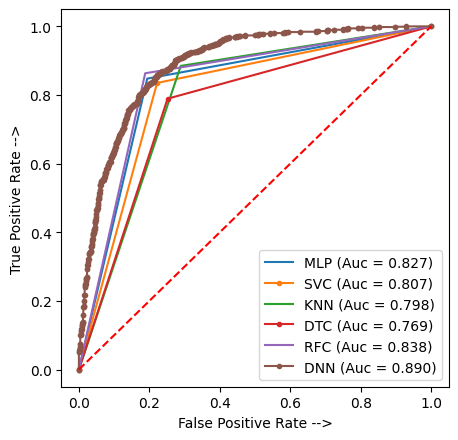

In [ ]:
from sklearn.metrics import roc_curve, auc

mlp_fpr,mlp_tpr, threshold = roc_curve(ytest, y_pred_mlp)
auc_mlp = auc(mlp_fpr, mlp_tpr)
svc_fpr, svc_tpr, threshold = roc_curve(ytest, ypred_svc)
auc_svc = auc(svc_fpr, svc_tpr)
knn_fpr, knn_tpr, threshold = roc_curve(ytest, ypred_knn)
auc_knn = auc(knn_fpr, knn_tpr)
dtc_fpr, dtc_tpr, threshold = roc_curve(ytest, y_pred_dtc)
auc_dtc = auc(dtc_fpr, dtc_tpr)
rfc_fpr, rfc_tpr, threshold = roc_curve(ytest, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)
dnn_fpr,dnn_tpr, threshold = roc_curve(ytest, y_pred_dnn)
auc_dnn= auc(dnn_fpr, dnn_tpr)



plt.figure(figsize=(5, 5), dpi=100)
plt.plot(mlp_fpr, mlp_tpr,linestyle='-', label='MLP (Auc = %0.3f)' % auc_mlp)
plt.plot(svc_fpr, svc_tpr, marker='.', label='SVC (Auc = %0.3f)' % auc_svc)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (Auc = %0.3f)' % auc_knn)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='DTC (Auc = %0.3f)' % auc_dtc)
plt.plot(rfc_fpr, rfc_tpr, linestyle='-', label='RFC (Auc = %0.3f)' % auc_rfc)
plt.plot(dnn_fpr, dnn_tpr, marker='.', label='DNN (Auc = %0.3f)' % auc_dnn)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()